In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns

In [30]:
df_preproducer_imputed = pd.read_csv("producer_imputedData.csv", index_col=[0])
df_preproducer_imputed.head()
df_prodHist = pd.read_csv("production_history.csv")


In [32]:
## Aggregation feature function
df_agg = df_preproducer_imputed.drop(["Rock facies"], axis = 1)
df_agg = df_agg.groupby("Well_ID").agg("mean")
df_agg.head()

df_agg_merge = df_agg.merge(df_prodHist, how = 'inner', on = 'Well_ID')
df_agg_merge.head()

,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay,"Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,7325,7175,3057.550000,0.133426,115.099143,7.221834e+06,2.141876,3392.897466,25.333611,1656.844649,6.192136,0.133335,450.98,684.20,847.33,494.89,1236.40,2108.7
1,Well_no_10,3725,1575,3057.820000,0.112654,74.651251,7.474489e+06,1.827084,4038.679249,30.218813,1682.659828,5.592101,0.399980,229.35,388.35,518.27,222.51,528.21,880.8
2,Well_no_11,4275,5675,3050.470000,0.128556,92.894287,7.286664e+06,2.086964,3527.987993,26.446185,1681.960101,6.187106,0.233325,512.80,791.55,978.14,189.40,589.27,1120.3
3,Well_no_12,1625,3775,3057.797368,0.126319,108.875384,7.324012e+06,1.918122,3841.739107,29.032313,1627.507010,5.216026,0.280689,422.81,659.42,840.47,380.47,987.10,1714.1
4,Well_no_13,5175,8875,3058.566316,0.137389,105.816837,7.299270e+06,2.077762,3742.859030,26.852747,1667.159259,5.869177,0.175437,357.06,569.71,732.29,536.04,1243.10,2049.9


In [48]:
dropData = ["Well_ID", "Cumulative oil production (1 yr), MSTB", "Cumulative oil production (2 yr), MSTB",
           "Cumulative oil production (3 yr), MSTB", "Cumulative Water production (1 yr), MSTB",
           "Cumulative Water production (2 yr), MSTB", "Cumulative Water production (3 yr), MSTB"]

df_agg_data = df_agg_merge.drop(dropData, axis = 1)
df_agg_target = df_agg_merge["Cumulative oil production (3 yr), MSTB"]

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
train, test, target, target_test = train_test_split(df_agg_data, df_agg_target, test_size=0.2, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestRegressor
randomF = RandomForestRegressor(max_depth = 300, random_state=0)
score = cross_val_score(randomF, train, target, cv = 5, scoring='neg_mean_absolute_error')

score

array([-128.4298    , -216.91765833, -293.52255   , -124.69565455,
       -178.28121818])

In [37]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train, target)

RandomForestRegressor(max_depth=2, random_state=0)

Text(0, 0.5, 'Abs Percent error (%)')

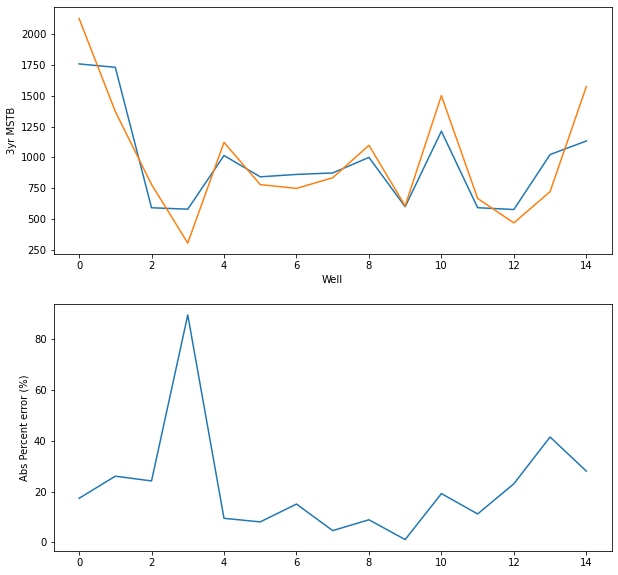

In [38]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), regr.predict(test)) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')

ax[1].plot(np.arange(test.shape[0]), np.abs(regr.predict(test) - target_test)/target_test * 100)
ax[1].set_ylabel('Abs Percent error (%)')

In [39]:
np.mean(np.abs(regr.predict(test) - target_test))

188.3308324494577

In [49]:
from sklearn.tree import DecisionTreeRegressor
regs = DecisionTreeRegressor(criterion='mse', splitter='best', max_leaf_nodes = 150)
regs.fit(train, target)

DecisionTreeRegressor(max_leaf_nodes=150)

In [57]:
yPred = regs.predict(test)
regs.score(target_test, yPred)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), yPred) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')


ValueError: Expected 2D array, got 1D array instead:
array=[2124.8  1372.2   781.4   307.12 1122.1   780.12  749.4   835.5  1098.1
  608.09 1500.    668.02  470.12  723.75 1573.2 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

748191.7507999999

In [55]:
target_test.shape

(15,)

Text(0, 0.5, 'Abs Percent error (%)')

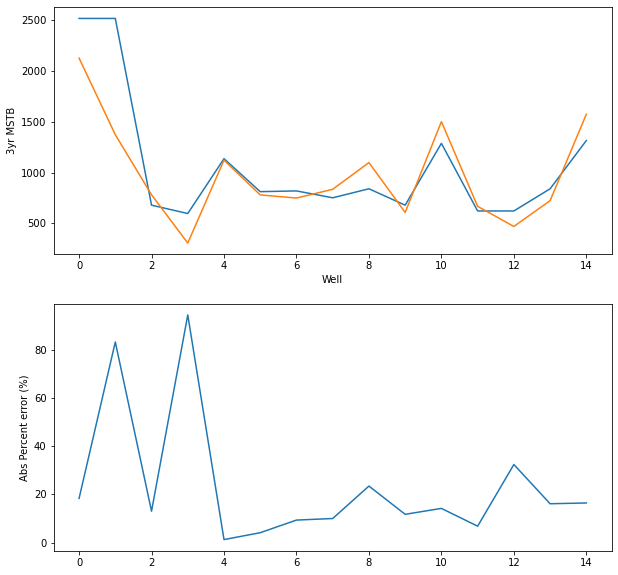

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), regs.predict(test)) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')

ax[1].plot(np.arange(test.shape[0]), np.abs(regs.predict(test) - target_test)/target_test * 100)
ax[1].set_ylabel('Abs Percent error (%)')

## Kriging map

In [62]:
df_agg_data.head(2)

,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay
0,7325,7175,3057.55,0.133426,115.099143,7.221834e+06,2.141876,3392.897466,25.333611,1656.844649,6.192136,0.133335
1,3725,1575,3057.82,0.112654,74.651251,7.474489e+06,1.827084,4038.679249,30.218813,1682.659828,5.592101,0.399980


In [63]:
df_agg_target.head(2)

0    847.33
1    518.27
Name: Cumulative oil production (3 yr), MSTB, dtype: float64

In [ ]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Input space
X = np.array(list(zip(df_agg_data['X, m'], df_agg_data['Y, m'])))
X = X/10000
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([2,2], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0p, X1p, Zp)
plt.gca().invert_yaxis()

plt.show()

In [95]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

df_agg_data2 = df_agg_data.copy()
df_agg_data2['Permeability, mD'].apply(np.log)

df_scaled = (df_agg_data2 - df_agg_data2.min())/ (df_agg_data2.max() - df_agg_data2.min())
df_scaled.head()

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_agg_target, test_size=0.20, random_state=0)
gp = GaussianProcessRegressor(n_restarts_optimizer=15)

gp.fit(X_train, y_train)

GaussianProcessRegressor(n_restarts_optimizer=15)

In [96]:
y_pred, MSE = gp.predict(X_test, return_std=True)
y_pred

array([2119.64337345, 1636.76352441,  863.35189385,  315.83430104,
        820.78118267,  950.05254851,  779.7889025 ,  817.60629944,
        669.03195372,  505.21153826, 1283.91063213,  844.55215959,
        578.99002951,  929.42331073, 1494.06165538])

In [97]:
np.mean(np.abs(y_pred - y_test)/y_test * 100)

16.074074423209858

In [ ]:
df_preProducer_imputed.to_csv("IMPUTED_wellbore_data_preproducer.csv")
df_producer_imputed.to_csv("IMPUTED_wellbore_data_producer.csv")

In [483]:
df_preProducer_imputed = pd.read_csv("IMPUTED_wellbore_data_preproducer.csv", index_col=[0]).drop("Rock facies", axis = 1)
df_producer_imputed = pd.read_csv("IMPUTED_wellbore_data_producer.csv", index_col=[0]).drop("Rock facies", axis = 1)

df_merge = pd.concat([df_preProducer_imputed, df_producer_imputed],axis=0).sort_values(['Well_ID', 'Depth, m'])

df_merge_scaled = df_merge.copy()

df_merge_scaled['X, m'] = df_merge['X, m']/10000 
df_merge_scaled['Y, m'] = df_merge['Y, m']/10000 

def minMaxScaling(df, targetFeature):
    return ( df[targetFeature] - df[targetFeature].min() ) / ( df[targetFeature].max() - df[targetFeature].min())

def logMinMaxScaling(df, targetFeature):
    return ( np.log(df[targetFeature]) - np.log(df[targetFeature]).min() ) / ( np.log(df[targetFeature]).max() - np.log(df[targetFeature]).min() )


df_merge_scaled['Depth, m'] = minMaxScaling(df_merge, 'Depth, m')
df_merge_scaled['Porosity, fraction'] = minMaxScaling(df_merge, 'Porosity, fraction')
df_merge_scaled['Density, g/cm3'] = minMaxScaling(df_merge, 'Density, g/cm3')
df_merge_scaled['Permeability, mD'] = logMinMaxScaling(df_merge, 'Permeability, mD')
df_merge_scaled['Acoustic Impedance, kg*s/m^2'] = minMaxScaling(df_merge, 'Density, g/cm3')
df_merge_scaled['Compressible velocity, m/s'] = minMaxScaling(df_merge, 'Compressible velocity, m/s')
df_merge_scaled['Youngs modulus, GPa'] = minMaxScaling(df_merge, 'Youngs modulus, GPa')
df_merge_scaled['Shear velocity, m/s'] = minMaxScaling(df_merge, 'Shear velocity, m/s')
df_merge_scaled['Shear modulus, GPa'] = minMaxScaling(df_merge, 'Shear modulus, GPa')
df_merge_scaled['Vclay'] = minMaxScaling(df_merge, 'Vclay')


## Putting the data back  
preProducer_Well_ID = ['Well_no_{}'.format(x) for x in range(74, 84)]
df_preProducer_imputed_scale = df_merge_scaled[df_merge_scaled['Well_ID'].isin(preProducer_Well_ID)]
df_producer_imputed_scale = df_merge_scaled[~df_merge_scaled['Well_ID'].isin(preProducer_Well_ID)]

In [484]:
df_prodHist = pd.read_csv("production_history.csv")

## Training dataset 
df_agg_producer = df_producer_imputed_scale.copy()
df_agg_producer = df_agg_producer.groupby("Well_ID").agg("mean")

df_agg_merge_producer = df_agg_producer.merge(df_prodHist, how = 'inner', on = 'Well_ID')
df_agg_merge_producer.head()

dropData = ["Well_ID", "Cumulative oil production (1 yr), MSTB", "Cumulative oil production (2 yr), MSTB",
           "Cumulative oil production (3 yr), MSTB", "Cumulative Water production (1 yr), MSTB",
           "Cumulative Water production (2 yr), MSTB", "Cumulative Water production (3 yr), MSTB"]
           #'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear velocity, m/s', 'Shear modulus, GPa', 'Vclay', 'Depth, m']

dropData2 = ["Well_ID"]
             #'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear velocity, m/s', 'Shear modulus, GPa', 'Vclay', 'Depth, m']

df_agg_merge_producer_train = df_agg_merge_producer.drop(dropData, axis = 1)
df_agg_merge_producer_target = df_agg_merge_producer["Cumulative oil production (3 yr), MSTB"]


### Testing dataset
df_agg_preProducer = df_preProducer_imputed_scale.copy()
df_agg_preProducer = df_agg_preProducer.groupby("Well_ID").agg("mean").reset_index()

df_agg_preProducer = df_agg_preProducer.drop(dropData2, axis = 1)

In [485]:
##Make prediction map 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import cross_val_score

gp = GaussianProcessRegressor(n_restarts_optimizer=15)
gp.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)
result = gp.predict(df_agg_preProducer)
print(cross_val_score(gp, df_agg_merge_producer_train, df_agg_merge_producer_target, scoring='neg_mean_absolute_error').mean())

from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
randomForest.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)
result2 = randomForest.predict(df_agg_preProducer)
print(cross_val_score(randomForest, df_agg_merge_producer_train, df_agg_merge_producer_target, scoring='neg_mean_absolute_error').mean())

from sklearn.svm import SVR
supportVR = SVR(kernel = 'rbf')
supportVR.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)
result3 = supportVR.predict(df_agg_preProducer)
print(cross_val_score(supportVR, df_agg_merge_producer_train, df_agg_merge_producer_target, scoring='neg_mean_absolute_error').mean())

-414.4209392250551
-189.97127330412286
-314.4545581259876


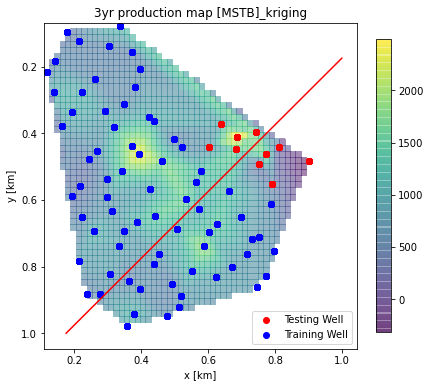

In [486]:
from scipy.interpolate import interp2d
from scipy.interpolate import LinearNDInterpolator

##Aggregate the data tfor plotting purpuse 
X_data = np.hstack((df_agg_merge_producer_train['X, m'].values, df_agg_preProducer['X, m'].values))
Y_data = np.hstack((df_agg_merge_producer_train['Y, m'].values, df_agg_preProducer['Y, m'].values))
Z_data = np.hstack((df_agg_merge_producer_target.values, result))

X_prod3 = np.linspace(min(X_data), max(X_data))
Y_prod3 = np.linspace(min(Y_data), max(Y_data))
X_prod3, Y_prod3 = np.meshgrid(X_prod3, Y_prod3) 
interp = LinearNDInterpolator(list(zip(X_data, Y_data)), Z_data)
Z_prod3 = interp(X_prod3, Y_prod3)

fig, ax = plt.subplots(figsize = (7, 6))
im0 = ax.pcolormesh(X_prod3, Y_prod3, Z_prod3, shading='auto', alpha = 0.5) 
ax.plot([10000/10000, 1750/10000], [1750/10000, 10000/10000], 'r')
im1 = ax.scatter(df_preProducer_imputed_scale['X, m'], df_preProducer_imputed_scale['Y, m'], c = 'red')
im2 = ax.scatter(df_producer_imputed_scale['X, m'], df_producer_imputed_scale['Y, m'], c = 'blue')

#Plotting Well Number
#wellNumberMarker = [x.split("_")[-1] for x in df_producer['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_producer['X, m'][i], df_producer['Y, m'][i])))
#wellNumberMarker = [x.split("_")[-1] for x in df_preProc['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_preProc['X, m'][i], df_preProc['Y, m'][i])))

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('3yr production map [MSTB]_kriging')
ax.legend([im1, im2], ['Testing Well', 'Training Well'])

fig.colorbar(im0, ax = ax, shrink=0.9)
plt.gca().invert_yaxis()

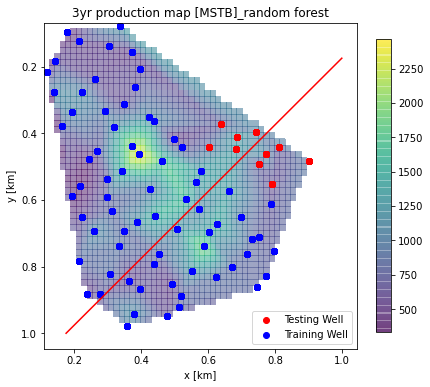

In [487]:
from scipy.interpolate import interp2d
from scipy.interpolate import LinearNDInterpolator

##Aggregate the data tfor plotting purpuse 
X_data = np.hstack((df_agg_merge_producer_train['X, m'].values, df_agg_preProducer['X, m'].values))
Y_data = np.hstack((df_agg_merge_producer_train['Y, m'].values, df_agg_preProducer['Y, m'].values))
Z_data = np.hstack((df_agg_merge_producer_target.values, result2))

X_prod3 = np.linspace(min(X_data), max(X_data))
Y_prod3 = np.linspace(min(Y_data), max(Y_data))
X_prod3, Y_prod3 = np.meshgrid(X_prod3, Y_prod3) 
interp = LinearNDInterpolator(list(zip(X_data, Y_data)), Z_data)
Z_prod3 = interp(X_prod3, Y_prod3)

fig, ax = plt.subplots(figsize = (7, 6))
im0 = ax.pcolormesh(X_prod3, Y_prod3, Z_prod3, shading='auto', alpha = 0.5) 
ax.plot([10000/10000, 1750/10000], [1750/10000, 10000/10000], 'r')
im1 = ax.scatter(df_preProducer_imputed_scale['X, m'], df_preProducer_imputed_scale['Y, m'], c = 'red')
im2 = ax.scatter(df_producer_imputed_scale['X, m'], df_producer_imputed_scale['Y, m'], c = 'blue')

#Plotting Well Number
#wellNumberMarker = [x.split("_")[-1] for x in df_producer['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_producer['X, m'][i], df_producer['Y, m'][i])))
#wellNumberMarker = [x.split("_")[-1] for x in df_preProc['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_preProc['X, m'][i], df_preProc['Y, m'][i])))

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('3yr production map [MSTB]_random forest')
ax.legend([im1, im2], ['Testing Well', 'Training Well'])

fig.colorbar(im0, ax = ax, shrink=0.9)
plt.gca().invert_yaxis()

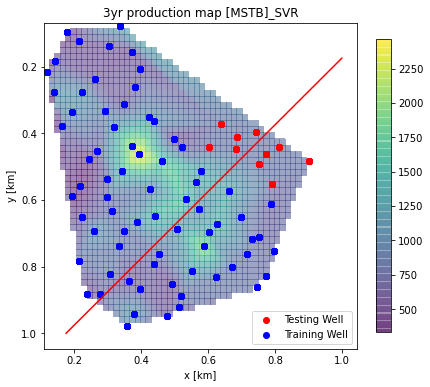

In [488]:
from scipy.interpolate import interp2d
from scipy.interpolate import LinearNDInterpolator

##Aggregate the data tfor plotting purpuse 
X_data = np.hstack((df_agg_merge_producer_train['X, m'].values, df_agg_preProducer['X, m'].values))
Y_data = np.hstack((df_agg_merge_producer_train['Y, m'].values, df_agg_preProducer['Y, m'].values))
Z_data = np.hstack((df_agg_merge_producer_target.values, result3))

X_prod3 = np.linspace(min(X_data), max(X_data))
Y_prod3 = np.linspace(min(Y_data), max(Y_data))
X_prod3, Y_prod3 = np.meshgrid(X_prod3, Y_prod3) 
interp = LinearNDInterpolator(list(zip(X_data, Y_data)), Z_data)
Z_prod3 = interp(X_prod3, Y_prod3)

fig, ax = plt.subplots(figsize = (7, 6))
im0 = ax.pcolormesh(X_prod3, Y_prod3, Z_prod3, shading='auto', alpha = 0.5) 
ax.plot([10000/10000, 1750/10000], [1750/10000, 10000/10000], 'r')
im1 = ax.scatter(df_preProducer_imputed_scale['X, m'], df_preProducer_imputed_scale['Y, m'], c = 'red')
im2 = ax.scatter(df_producer_imputed_scale['X, m'], df_producer_imputed_scale['Y, m'], c = 'blue')

#Plotting Well Number
#wellNumberMarker = [x.split("_")[-1] for x in df_producer['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_producer['X, m'][i], df_producer['Y, m'][i])))
#wellNumberMarker = [x.split("_")[-1] for x in df_preProc['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_preProc['X, m'][i], df_preProc['Y, m'][i])))

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('3yr production map [MSTB]_SVR')
ax.legend([im1, im2], ['Testing Well', 'Training Well'])

fig.colorbar(im0, ax = ax, shrink=0.9)
plt.gca().invert_yaxis()

In [342]:
### Fine tuning random forest
from sklearn.model_selection import GridSearchCV
randomForest_tune = RandomForestRegressor()
parameters = {'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [5, 7, 12, 17, 25, 30]}
clf = GridSearchCV(randomForest_tune, parameters, verbose = 3, scoring = 'neg_mean_absolute_error')

clf.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-184.389, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-202.762, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-226.341, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-204.367, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-163.210, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... max_depth=5, n_estimators=25, score=-147.078, total=   0.1s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-209.476, total=   0.1s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-214.937, total=   0.1s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-245.009, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-163.259, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..... max_depth=5, n_estimators=50, score=-146.722, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..... max_depth=5, n_estimators=50, score=-225.303, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.6s finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 12, 17, 25, 30],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

In [343]:
print(clf.best_params_) 
print(clf.best_score_) 

{'max_depth': 17, 'n_estimators': 25}
-187.01592038095237


In [344]:
from sklearn.ensemble import GradientBoostingRegressor
XGboost_tune = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [5, 10, 25, 50, 100], 'max_depth': [2, 4, 6, 8]}
clf_XG = GridSearchCV(XGboost_tune, parameters, scoring = 'neg_mean_absolute_error', verbose = 3)
clf_XG.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-284.464, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-313.685, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-389.112, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-400.680, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-245.716, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=10, score=-279.178, total=   0.0s
[

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.0s finished


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

In [345]:
print(clf_XG.best_params_) 
print(clf_XG.best_score_) 

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 25}
-183.18376430113702


In [346]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
print(cross_val_score(linearReg, df_agg_merge_producer_train, df_agg_merge_producer_target, scoring='neg_mean_absolute_error').mean())

-180.3949772096449


In [347]:
from sklearn.neighbors import KNeighborsRegressor
kNN_tune = KNeighborsRegressor()
parameters = {'n_neighbors': [3,4,5,6,7,8,9]}
clf_kNN = GridSearchCV(kNN_tune, parameters, scoring = 'neg_mean_absolute_error', verbose = 3)
clf_kNN.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_neighbors=3, score=-161.234, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-204.100, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-308.224, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-225.444, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-199.634, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................... n_neighbors=4, score=-207.618, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................... n_neighbors=4, score=-202.196, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... n_neighbors=5, score=-240.496, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, score=-168.488, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................... n_neighbors=6, score=-222.243, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................... n_neighbors=6, score=-200.383, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................... n_neighbors=6, score=-280.600, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................... n_neighbors=6, score=-247.007, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................... n_neighbors=6, score=-177.131, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error', verbose=3)

In [348]:
print(clf_kNN.best_params_) 
print(clf_kNN.best_score_) 

{'n_neighbors': 4}
-212.91247619047618


In [349]:
df_agg_merge_producer_train.head()

,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay
0,0.7325,0.7175,0.576886,0.626719,0.704912,0.244490,0.244490,0.383164,0.409001,0.607928,0.446566,0.133335
1,0.3725,0.1575,0.589942,0.486973,0.631026,0.157614,0.157614,0.526105,0.535687,0.634639,0.387560,0.399980
2,0.4275,0.5675,0.234526,0.593959,0.668010,0.229335,0.229335,0.413066,0.437853,0.633915,0.446071,0.233325
3,0.1625,0.3775,0.588848,0.578912,0.696575,0.182738,0.182738,0.482513,0.504918,0.577572,0.350577,0.280689
4,0.5175,0.8875,0.626031,0.653382,0.691389,0.226796,0.226796,0.460627,0.448396,0.618600,0.414807,0.175437


Optimal number of features : 12


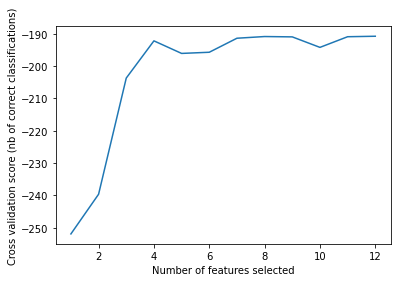

[]


In [489]:
## Recursive feature slection -- random forest 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
RF_feature = RandomForestRegressor(max_depth = 7, n_estimators = 100)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RF_feature, step=1, cv = 5,
              scoring='neg_mean_absolute_error',
              min_features_to_select = min_features_to_select)
rfecv.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

print(np.where(rfecv.support_ == False)[0])

In [490]:
### Fine tuning random forest
from sklearn.model_selection import GridSearchCV
RF_featureImportance = RandomForestRegressor(max_depth = 7, n_estimators = 100)

RF_featureImportance.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

RandomForestRegressor(max_depth=7)

In [352]:
RF_featureImportance.feature_importances_

array([0.03140147, 0.03883919, 0.11687681, 0.29057177, 0.37940541,
       0.00986723, 0.00956036, 0.01750391, 0.03773717, 0.01807366,
       0.01718295, 0.03298007])

<BarContainer object of 12 artists>

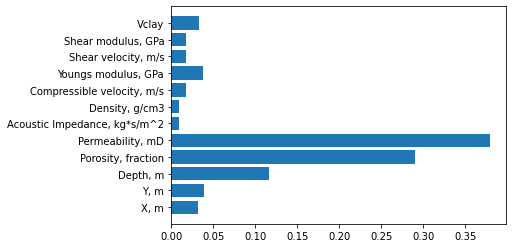

In [353]:
plt.figure()
plt.barh(df_agg_merge_producer_train.columns, RF_featureImportance.feature_importances_)

In [ ]:
## Try dropping the data frame 
X = df_agg_merge_producer_train.copy()
X_test = df_agg_preProducer.copy()

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

Optimal number of features : 8


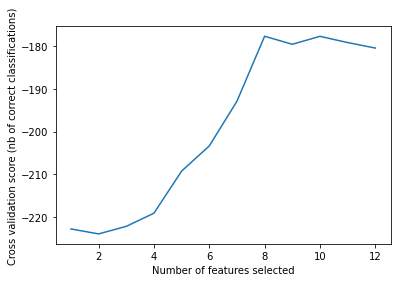

[ 0  1  9 11]


In [422]:
## Recursive feature slection -- Linear regression 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create the RFE object and compute a cross-validated score.
linearReg = LinearRegression()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=linearReg, step=1, cv = 5,
              scoring='neg_mean_absolute_error',
              min_features_to_select = min_features_to_select)

rfecv.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

print(np.where(rfecv.support_ == False)[0])

<AxesSubplot:>

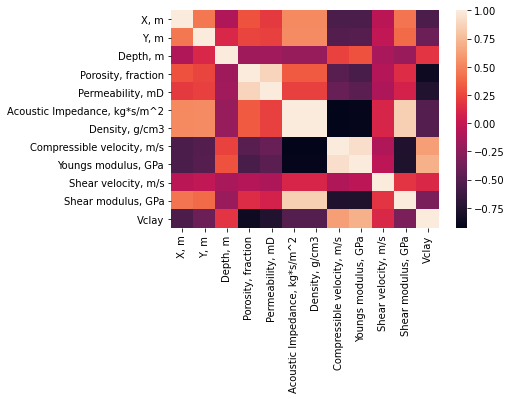

In [423]:
sns.heatmap(df_agg_merge_producer_train.corr())

In [476]:
## Try dropping the data frame 
X = df_agg_merge_producer_train.copy()
X_test = df_agg_preProducer.copy()

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

linearReg = LinearRegression(normalize=True)
print(cross_val_score(linearReg, X, df_agg_merge_producer_target, scoring='neg_mean_absolute_error').mean())

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, df_agg_merge_producer_target, test_size=0.33, random_state=42)  
# Fitting line without spliting test-train gives similar results 

linearReg.fit(X, df_agg_merge_producer_target)
result4 = linearReg.predict(X_test)

-177.87297559462303


<BarContainer object of 8 artists>

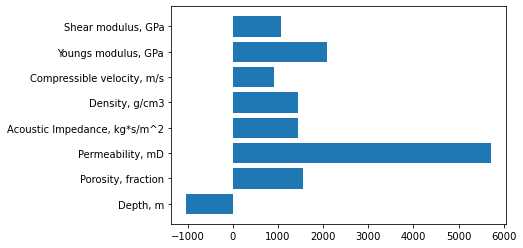

In [477]:
plt.figure()
plt.barh(X.columns, linearReg.coef_)

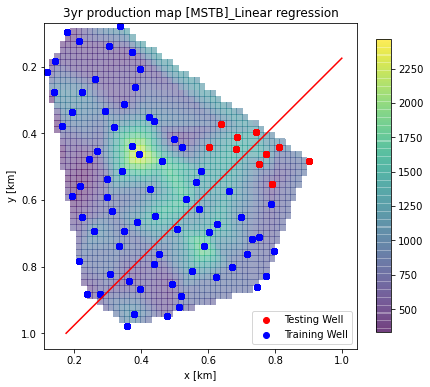

In [478]:
from scipy.interpolate import interp2d
from scipy.interpolate import LinearNDInterpolator

##Aggregate the data tfor plotting purpuse 
X_data = np.hstack((df_agg_merge_producer_train['X, m'].values, df_agg_preProducer['X, m'].values))
Y_data = np.hstack((df_agg_merge_producer_train['Y, m'].values, df_agg_preProducer['Y, m'].values))
Z_data = np.hstack((df_agg_merge_producer_target.values, result4))

X_prod3 = np.linspace(min(X_data), max(X_data))
Y_prod3 = np.linspace(min(Y_data), max(Y_data))
X_prod3, Y_prod3 = np.meshgrid(X_prod3, Y_prod3) 
interp = LinearNDInterpolator(list(zip(X_data, Y_data)), Z_data)
Z_prod3 = interp(X_prod3, Y_prod3)

fig, ax = plt.subplots(figsize = (7, 6))
im0 = ax.pcolormesh(X_prod3, Y_prod3, Z_prod3, shading='auto', alpha = 0.5) 
ax.plot([10000/10000, 1750/10000], [1750/10000, 10000/10000], 'r')
im1 = ax.scatter(df_preProducer_imputed_scale['X, m'], df_preProducer_imputed_scale['Y, m'], c = 'red')
im2 = ax.scatter(df_producer_imputed_scale['X, m'], df_producer_imputed_scale['Y, m'], c = 'blue')

#Plotting Well Number
#wellNumberMarker = [x.split("_")[-1] for x in df_producer['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_producer['X, m'][i], df_producer['Y, m'][i])))
#wellNumberMarker = [x.split("_")[-1] for x in df_preProc['Well_ID'].values]
#for i, txt in enumerate(wellNumberMarker):
#    ax.annotate(txt, ((df_preProc['X, m'][i], df_preProc['Y, m'][i])))

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('3yr production map [MSTB]_Linear regression')
ax.legend([im1, im2], ['Testing Well', 'Training Well'])

fig.colorbar(im0, ax = ax, shrink=0.9)
plt.gca().invert_yaxis()

In [457]:
result4

array([ 555.807808  ,  879.36176101, 1394.61363932, 1497.41482922,
       1325.26725933, 1412.69881774,  980.48071801,  919.95699355,
       1168.20798644,  875.42252024])

In [ ]:
### Prediction  --- linearReg.predict(X_test)

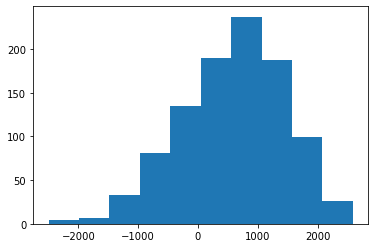

In [461]:
## Uncertainty analysis 
import random 
N = 1000      #number of picked point 
predictionALL = []
keyFeature = ['Depth, m', 'Porosity, fraction', 'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Density, g/cm3',
             'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear modulus, GPa']

for wellNum in range(74, 84):
    
    if wellNum >= 75:
        break ##Temp code
    
    wellName = "Well_no_{}".format(wellNum)
    
    #masking the data
    df = df_preProducer_imputed_scale[df_preProducer_imputed_scale["Well_ID"] == wellName]
    
    #Prediction distribution 
    predictionWell = []
    
    X_boostrap = np.zeros((N, len(keyFeature)))
    
    for i in range(len(keyFeature)):
        ## Select small feature
        series = df[keyFeature[i]]   
        
        ## Independently draw 
        data = np.random.choice(series.dropna(), N, replace = True)
        
        X_boostrap[:, i] = data
    
    yPred = linearReg.predict(X_boostrap)
    
    plt.figure()
    plt.hist(yPred)

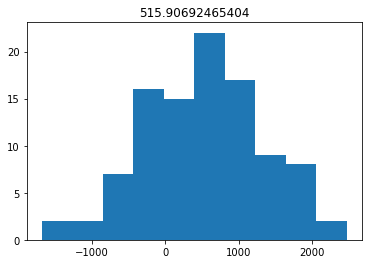

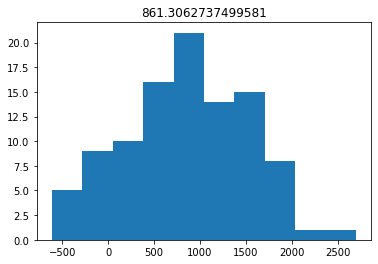

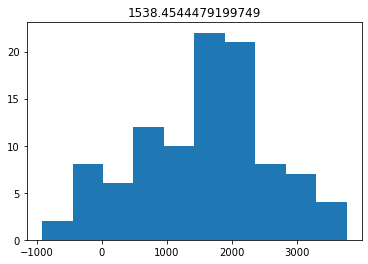

In [479]:
## Uncertainty analysis  --- Multivarient drawing 
import random 
N = 20000      #number of picked point 
predictionALL = []
keyFeature = ['Depth, m', 'Porosity, fraction', 'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Density, g/cm3',
             'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear modulus, GPa']

for wellNum in range(74, 84):
    
    if wellNum >= 77:
        break 
    
    wellName = "Well_no_{}".format(wellNum)
    
    #masking the data
    df = df_preProducer_imputed_scale[df_preProducer_imputed_scale["Well_ID"] == wellName]
    
    covMatrix = np.cov(df[keyFeature].dropna(), rowvar=False)
    meanVal = df[keyFeature].dropna().mean()
    X_boostrap = np.random.multivariate_normal(meanVal, covMatrix, size=100)    
    
    yPred = linearReg.predict(X_boostrap)
    plt.figure()
    plt.hist(yPred)
    plt.title("{}".format(np.mean(yPred)))

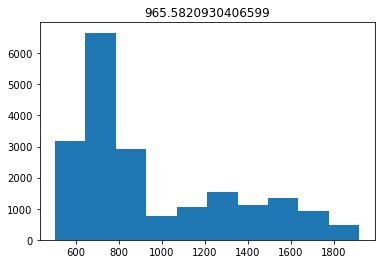

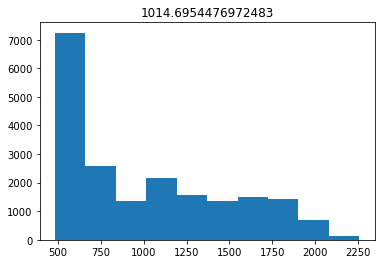

In [504]:
## Uncertainty analysis  --- Multivarient drawing  -- random forest
import random 
N = 20000      #number of picked point 
predictionALL = np.zeros((10, N))
keyFeature = ['Depth, m', 'Porosity, fraction', 'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Density, g/cm3',
             'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear modulus, GPa']
i = 0
for wellNum in range(74, 84):
    
    wellName = "Well_no_{}".format(wellNum)
    
    #masking the data
    df = df_preProducer_imputed_scale[df_preProducer_imputed_scale["Well_ID"] == wellName].drop("Well_ID", axis = 1)
    
    covMatrix = np.cov(df.dropna(), rowvar=False)
    meanVal = df.dropna().mean()
    X_boostrap = np.random.multivariate_normal(meanVal, covMatrix, size=N)    
    
    yPred = RF_featureImportance.predict(X_boostrap)
    
    predictionALL[i, :] = yPred
    i = i + 1
    if wellNum < 76:
        plt.figure()
        plt.hist(yPred)
        plt.title("{}".format(np.mean(yPred)))

In [502]:
predictionALL.mean(axis = 1)

array([ 964.00435485, 1015.16896713, 1263.22667999, 1442.28520512,
       1280.78935627, 1396.18136347, 1169.58795344, 1060.60710937,
       1210.55568164, 1004.94456095])

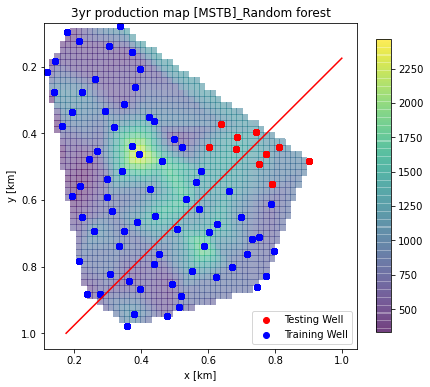

In [505]:
from scipy.interpolate import interp2d
from scipy.interpolate import LinearNDInterpolator

##Aggregate the data tfor plotting purpuse 
X_data = np.hstack((df_agg_merge_producer_train['X, m'].values, df_agg_preProducer['X, m'].values))
Y_data = np.hstack((df_agg_merge_producer_train['Y, m'].values, df_agg_preProducer['Y, m'].values))
Z_data = np.hstack((df_agg_merge_producer_target.values, predictionALL.mean(axis = 1)))

X_prod3 = np.linspace(min(X_data), max(X_data))
Y_prod3 = np.linspace(min(Y_data), max(Y_data))
X_prod3, Y_prod3 = np.meshgrid(X_prod3, Y_prod3) 
interp = LinearNDInterpolator(list(zip(X_data, Y_data)), Z_data)
Z_prod3 = interp(X_prod3, Y_prod3)

fig, ax = plt.subplots(figsize = (7, 6))
im0 = ax.pcolormesh(X_prod3, Y_prod3, Z_prod3, shading='auto', alpha = 0.5) 
ax.plot([10000/10000, 1750/10000], [1750/10000, 10000/10000], 'r')
im1 = ax.scatter(df_preProducer_imputed_scale['X, m'], df_preProducer_imputed_scale['Y, m'], c = 'red')
im2 = ax.scatter(df_producer_imputed_scale['X, m'], df_producer_imputed_scale['Y, m'], c = 'blue')

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('3yr production map [MSTB]_Random forest')
ax.legend([im1, im2], ['Testing Well', 'Training Well'])

fig.colorbar(im0, ax = ax, shrink=0.9)
plt.gca().invert_yaxis()

In [506]:
predictionALL

array([[ 642.41052788, 1348.74280595,  760.76712611, ...,  884.435825  ,
         855.89445516,  747.19709944],
       [1856.7942    ,  508.19213417, 1713.91625   , ..., 1887.9558    ,
         587.63624337, 1164.2857288 ],
       [1828.31988167, 1791.2292    , 2091.669     , ...,  512.85983   ,
        2035.423     ,  587.93351671],
       ...,
       [ 519.71320188,  603.62721036,  539.75150881, ...,  525.74335734,
        2217.083     , 1013.4943029 ],
       [ 819.06833595,  726.2165356 , 2097.9485    , ..., 1550.15480641,
         881.76913119, 1725.34343159],
       [ 717.37811417,  698.15516647,  839.70232702, ...,  735.3164278 ,
         717.12719298, 1671.38012564]])

In [521]:
finalSolution = []
for i in range(10):
    finalSolution.append(np.percentile(predictionALL[i, :], range(1, 101)))

finalSolution = np.array(finalSolution)
finalSolution = np.hstack((predictionALL.mean(axis = 1)[:, np.newaxis], finalSolution))

In [524]:
pd.DataFrame(finalSolution).to_csv("solution.csv")

In [522]:
finalSolution

array([[ 965.58209304,  545.2943019 ,  562.66860849, ..., 1821.3435    ,
        1847.808734  , 1920.0173    ],
       [1014.6954477 ,  497.88965917,  498.42885917, ..., 1956.0663    ,
        1984.5001675 , 2256.96      ],
       [1274.35104268,  510.87084   ,  534.23201638, ..., 2227.06214   ,
        2237.38448   , 2268.67      ],
       ...,
       [1052.27897313,  494.75069333,  500.91515803, ..., 2058.5313    ,
        2117.0389    , 2261.432     ],
       [1215.70855656,  629.71006589,  648.80178998, ..., 2119.349449  ,
        2140.3099    , 2252.075     ],
       [1003.90585299,  533.11657205,  542.81149131, ..., 1890.40558081,
        1937.16449231, 2139.33966667]])

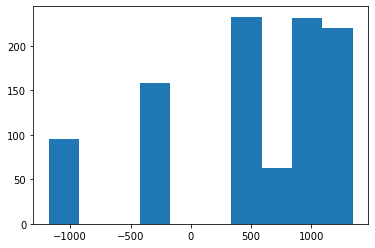

In [482]:
## Uncertainty analysis 
import random 
N = 1000      #number of picked point 
predictionALL = []
keyFeature = ['Depth, m', 'Porosity, fraction', 'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Density, g/cm3',
             'Compressible velocity, m/s', 'Youngs modulus, GPa', 'Shear modulus, GPa']

for wellNum in range(74, 84):
    
    if wellNum >= 75:
        break ##Temp code
    
    wellName = "Well_no_{}".format(wellNum)
    
    #masking the data
    df = df_preProducer_imputed_scale[df_preProducer_imputed_scale["Well_ID"] == wellName]
    
    #Prediction distribution 
    predictionWell = []
    
    #Cropout a row
    matrix = df[keyFeature].dropna().values
        
    ## Independently draw 
    idx = np.random.randint(0, high = matrix.shape[0], size = N)
    X_boostrap = matrix[idx, :]
    
    yPred = linearReg.predict(X_boostrap)
    
    plt.figure()
    plt.hist(yPred)

In [435]:
df[keyFeature].dropna().head()

,"Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear modulus, GPa"
2,0.284816,0.124529,0.473814,0.532958,0.532958,0.221009,0.241522,0.545943
4,0.333172,0.555571,0.574679,0.116563,0.116563,0.613260,0.666455,0.211526
6,0.381528,0.571313,0.620615,0.199213,0.199213,0.482168,0.418929,0.377677
8,0.429884,0.633006,0.610453,0.130034,0.130034,0.444018,0.594639,0.336633
9,0.454062,0.133140,0.394625,0.299274,0.299274,0.329171,0.353857,0.659679


In [480]:
np.random.choice(np.array([[1,1,1], [2,2,2]]), 10, replace = True)

ValueError: a must be 1-dimensional

array([0.42849429, 0.69208485, 0.66118604, 0.13971074, 0.13971074,
       0.46434812, 0.5260155 , 0.35414836])

In [395]:
df_preProducer_imputed_scale.head()

,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay
0,Well_no_74,0.7925,0.5525,0.236460,NaN,NaN,NaN,NaN,0.381986,NaN,0.597331,0.450283,0.6667
1,Well_no_74,0.7925,0.5525,0.260638,0.341025,NaN,0.170281,0.170281,NaN,NaN,0.409482,0.322468,0.3333
2,Well_no_74,0.7925,0.5525,0.284816,0.124529,0.473814,0.532958,0.532958,0.221009,0.241522,0.518568,0.545943,0.6667
3,Well_no_74,0.7925,0.5525,0.308994,NaN,NaN,0.221502,0.221502,0.359418,0.452017,0.603015,0.475476,0.3333
4,Well_no_74,0.7925,0.5525,0.333172,0.555571,0.574679,0.116563,0.116563,0.613260,0.666455,0.649808,0.211526,0.3333


In [396]:
df_preProducer_imputed_scale['Well_ID'].unique()

array(['Well_no_74', 'Well_no_75', 'Well_no_76', 'Well_no_77',
       'Well_no_78', 'Well_no_79', 'Well_no_80', 'Well_no_81',
       'Well_no_82', 'Well_no_83'], dtype=object)

In [ ]:
A = np.array([])

In [398]:
import random
[random.choice([1,2,3,4,5]) for _ in [1,2,3,4,5]]

[2, 5, 1, 3, 1]

array([5, 3, 5, 1, 5, 5, 4, 3, 4, 2, 2, 4, 2, 4, 4, 5, 4, 3, 5, 4, 1, 4,
       4, 1, 5, 2, 1, 3, 1, 1, 4, 4, 2, 2, 1, 5, 3, 3, 1, 3, 1, 1, 5, 2,
       5, 2, 1, 1, 5, 4, 3, 4, 4, 2, 4, 3, 4, 1, 3, 2, 5, 4, 3, 4, 3, 1,
       3, 2, 2, 5, 3, 3, 3, 4, 2, 5, 1, 5, 5, 3, 4, 5, 3, 3, 2, 1, 3, 4,
       4, 4, 5, 3, 5, 5, 1, 4, 4, 3, 3, 3])

In [370]:
from sklearn.preprocessing import PolynomialFeatures

## Recursive feature slection -- random forest 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create the RFE object and compute a cross-validated score.
polyReg = PolynomialFeatures(degree = 2)

from sklearn.model_selection import GridSearchCV
polyReg = PolynomialFeatures()
parameters = {'degree': [2,3,4,5]}
clf = GridSearchCV(polyReg, parameters, verbose = 3, scoring = 'neg_mean_absolute_error')

clf.fit(df_agg_merge_producer_train, df_agg_merge_producer_target)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] degree=2 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [387]:
from sklearn.preprocessing import PolynomialFeatures

X_polyReg = df_agg_merge_producer_train.copy()
X_polyReg.drop(X_polyReg.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

y_polyReg = df_agg_merge_producer_target.copy()
for nDeg in range(1, 6):
    poly = PolynomialFeatures(degree= nDeg)
    X_transform = poly.fit_transform(X_polyReg)

    linearReg = LinearRegression()
    print(nDeg)
    print(cross_val_score(linearReg, X_transform, y_polyReg, scoring='neg_mean_absolute_error').mean())

1
-177.87297559462294
2
-354.2037333333334
3
-550.136099136522
4
-508.15474813322663
5
-499.3103599098778


-451.5448571428571


In [359]:
X_test

,"Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear modulus, GPa"
0,0.466151,0.556415,0.623871,0.233698,0.233698,0.393298,0.427098,0.435512
1,0.433752,0.556750,0.662642,0.194286,0.194286,0.497204,0.501196,0.371604
2,0.405706,0.629934,0.724543,0.235002,0.235002,0.423188,0.465686,0.412482
3,0.333172,0.662211,0.737881,0.237111,0.237111,0.393987,0.399644,0.469184
4,0.393617,0.627299,0.723498,0.184923,0.184923,0.488026,0.500232,0.357404
5,0.351064,0.710544,0.707353,0.194599,0.194599,0.486120,0.479875,0.379289
6,0.397104,0.572503,0.665246,0.271630,0.271630,0.388446,0.416560,0.443864
7,0.522244,0.552146,0.681205,0.186557,0.186557,0.536601,0.508758,0.374962
8,0.283849,0.555160,0.671504,0.307098,0.307098,0.377231,0.393566,0.460477
9,0.349613,0.541358,0.656580,0.181100,0.181100,0.482780,0.501467,0.388806


In [ ]:
#Uncertainty 

for wellNumber in range(X_test.shape[0]):
    pass

In [324]:
## Kevin data
df_kevin = pd.read_csv("production_aggregate.csv")
df_kevin.tail()

preProducer_Well_ID = ['Well_no_{}'.format(x) for x in range(74, 84)]

df_kevin_producer = df_kevin[~df_kevin['Well_ID'].isin(preProducer_Well_ID)]
df_kevin_preproducer = df_kevin[df_kevin['Well_ID'].isin(preProducer_Well_ID)]

In [325]:
X = df_kevin_producer.drop(["Well_ID", "prod_cum_3yr"],axis = 1)
y = df_kevin_producer["prod_cum_3yr"]

In [312]:
from sklearn.model_selection import GridSearchCV
randomForest_tune = RandomForestRegressor()
parameters = {'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [5, 7, 12, 17, 25, 30]}
clf = GridSearchCV(randomForest_tune, parameters, verbose = 3, scoring = 'neg_mean_absolute_error')

clf.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-196.314, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-210.551, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-231.921, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-244.760, total=   0.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ..... max_depth=5, n_estimators=10, score=-203.685, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-188.512, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... max_depth=5, n_estimators=25, score=-206.247, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-240.216, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-224.270, total=   0.0s
[CV] max_depth=5, n_estimators=25 ....................................
[CV] ..... max_depth=5, n_estimators=25, score=-177.101, total=   0.0s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..... max_depth=5, n_estimators=50, score=-181.832, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..... max_depth=5, n_estimators=50, score=-188.759, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..... max_depth=5, n_estimators=50, score=-227.342, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   13.3s finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 12, 17, 25, 30],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

In [294]:
print(clf.best_params_) 
print(clf.best_score_) 

{'max_depth': 5, 'n_estimators': 100}
-206.88765872585518


In [295]:
from sklearn.ensemble import GradientBoostingRegressor
XGboost_tune = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [5, 10, 25, 50, 100], 'max_depth': [2, 4, 6, 8]}
clf_XG = GridSearchCV(XGboost_tune, parameters, scoring = 'neg_mean_absolute_error', verbose = 3)
clf_XG.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-286.587, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-313.685, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-386.288, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-400.680, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=5 .................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=5, score=-247.693, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=10, score=-284.119, total=   0.0s
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=50, score=-257.424, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=50, score=-279.043, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=50, score=-324.121, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=50, score=-310.096, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV]  learning_rate=0.01, max_depth=2, n_estimators=50, score=-219.247, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=-229.043, total=   0.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.6s finished


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

In [296]:
print(clf_XG.best_params_) 
print(clf_XG.best_score_) 

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 25}
-208.79627706688174


In [297]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
print(cross_val_score(linearReg, X, y, scoring='neg_mean_absolute_error').mean())

-223.20078896601473


In [300]:
from sklearn.neighbors import KNeighborsRegressor
kNN_tune = KNeighborsRegressor()
parameters = {'n_neighbors': [3,4,5,6,7,8,9]}
clf_kNN = GridSearchCV(kNN_tune, parameters, scoring = 'neg_mean_absolute_error', verbose = 3)
clf_kNN.fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-337.425, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-308.950, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-331.233, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-412.760, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, score=-373.480, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................... n_neighbors=4, score=-326.222, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... n_neighbors=8, score=-300.110, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .................... n_neighbors=8, score=-382.322, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .................... n_neighbors=8, score=-419.882, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .................... n_neighbors=8, score=-270.437, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, score=-297.969, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, score=-299.825, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, score=-382.776, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error', verbose=3)

In [301]:
print(clf_kNN.best_params_) 
print(clf_kNN.best_score_) 

{'n_neighbors': 6}
-327.0484619047619


Optimal number of features : 5


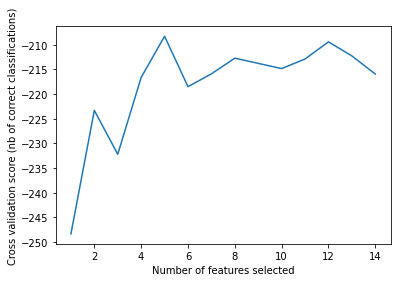

[ 3  4  5  6  7  8 10 12 13]


In [326]:
## Recursive feature slection -- random forest 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
RF_feature = RandomForestRegressor(max_depth = 7, n_estimators = 100)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RF_feature, step=1, cv = 5,
              scoring='neg_mean_absolute_error',
              min_features_to_select = min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

print(np.where(rfecv.support_ == False)[0])

In [327]:
### Fine tuning random forest
from sklearn.model_selection import GridSearchCV
RF_featureImportance = RandomForestRegressor(max_depth = 7, n_estimators = 100)

RF_featureImportance.fit(X, y)

RandomForestRegressor(max_depth=7)

<BarContainer object of 14 artists>

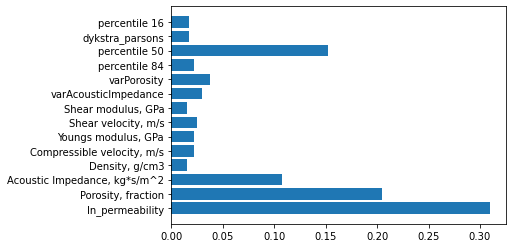

In [329]:
plt.figure()
plt.barh(X.columns, RF_featureImportance.feature_importances_)